# 概述

Numpy（Numerical Python的简称）是高性能科学计算和数据分析的基础包。使用飞桨构建神经网络模型时，通常会使用Numpy实现数据预处理和一些模型指标的计算，飞桨中的Tensor数据可以很方便的和ndarray数组进行相互转换。

本节主要介绍Numpy如下功能：

* ndarray数组：一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。
* 对整组数据进行快速运算的标准数学函数（无需编写循环）。
* 线性代数、随机数生成以及傅里叶变换功能。
* 读写磁盘数据、操作内存映射文件。
 
本质上，Numpy期望用户在执行“向量”操作时，会像使用“标量”一样轻松。大家可以先在本机上敲如下代码，感受一下Numpy的便捷。

In [1]:
>>> import numpy as np 
>>> a = np.array([1,2,3,4]) 
>>> b = np.array([10,20,30,40]) 
>>> c = a + b 
>>> print (c)

[11 22 33 44]


# 基础数据类型：ndarray数组

ndarray数组是Numpy的基础数据结构式，可以灵活、高效的处理多个元素的操作。本节主要从如下五部分展开介绍：

* 为什么引入ndarray数组
* 如何创建ndarray数组
* ndarray数组的基本运算
* ndarray数组的切片和索引
* ndarray数组的统计运算

## 为什么引入ndarray数组

Python中的list列表也可以非常灵活的处理多个元素的操作，但效率却非常低。与之比较，ndarray数组具有如下特点：

* ndarray数组中所有元素的数据类型相同、数据地址连续，批量操作数组元素时速度更快。而list列表中元素的数据类型可能不同，需要通过寻址方式找到下一个元素。
* ndarray数组支持广播机制，矩阵运算时不需要写for循环。
* Numpy底层使用c语言编写，内置并行计算功能，运行速度高于Python代码。

下面通过几个实际例子体会一下，在完成同一个任务时，使用ndarray数组和list列表的差异。

### 案例1：实现a+1的计算

In [1]:
# Python原生的list
# 假设有两个list
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]

# 完成如下计算
# 对a的每个元素 + 1
# a = a + 1 不能这么写，会报错
# a[:] = a[:] + 1 也不能这么写，也会报错
for i in range(5):
    a[i] = a[i] + 1
a

[2, 3, 4, 5, 6]

In [2]:
# 使用ndarray
import numpy as np
a = np.array([1, 2, 3, 4, 5])
a = a + 1
a

array([2, 3, 4, 5, 6])

###  案例2：实现c=a+b的计算

In [3]:
# 计算 a和b中对应位置元素的和，是否可以这么写？
a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]
c = a + b
# 检查输出发现，不是想要的结果
c

[1, 2, 3, 4, 5, 2, 3, 4, 5, 6]

In [4]:
# 使用for循环，完成两个list对应位置元素相加
c = []
for i in range(5):
    c.append(a[i] + b[i])
c

[3, 5, 7, 9, 11]

In [5]:
# 使用numpy中的ndarray完成两个ndarray相加
import numpy as np
a = np.array([1, 2, 3, 4, 5])
b = np.array([2, 3, 4, 5, 6])
c = a + b 
c

array([ 3,  5,  7,  9, 11])

通过上面的两个案例可以看出，在不写for循环的情况下，ndarray数组就可以非常方便的完成数学计算。在编写矢量或者矩阵的程序时，可以像编写普通数值一样，使得代码极其简洁。

另外，ndarray数组还提供了广播机制，它会按一定规则自动对数组的维度进行扩展以完成计算。如下面例子所示，1维数组和2维数组进行相加操作，ndarray数组会自动扩展1维数组的维度，然后再对每个位置的元素分别相加。

In [6]:
# 自动广播机制，1维数组和2维数组相加

# 二维数组维度 2x5
# array([[ 1,  2,  3,  4,  5],
#         [ 6,  7,  8,  9, 10]])
d = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
# c是一维数组，维度5
# array([ 4,  6,  8, 10, 12])
c = np.array([ 4,  6,  8, 10, 12])
e = d + c
e

array([[ 5,  8, 11, 14, 17],
       [10, 13, 16, 19, 22]])

## 创建ndarray数组

创建ndarray数组最简单的方式就是使用``array``函数，它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的numpy数组。下面通过实例体会下``array``、``arange``、``zeros``、``ones``四个主要函数的用法。

* ``array``：创建将嵌套序列（比如由一组等长列表组成的列表），并转换为一个多维数组。

In [3]:
# 导入numpy
import numpy as np

# 从list创建array 
a = [1,2,3,4,5,6]  # 创建简单的列表
b = np.array(a)    # 将列表转换为数组
b

array([1, 2, 3, 4, 5, 6])

* ``arange``：创建元素从0到10依次递增2的数组。

In [5]:
# 通过np.arange创建
# 通过指定start, stop (不包括stop)，interval来产生一个1维的ndarray
a = np.arange(0, 20, 2)
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

* ``zeros``：创建指定长度或者形状的全0数组。

In [6]:
# 创建全0的ndarray
a = np.zeros([3,3])
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

* ``ones``：创建指定长度或者形状的全1数组。

In [7]:
# 创建全1的ndarray
a = np.ones([3,3])
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 查看ndarray数组的属性

ndarray的属性包括``shape``、``dtype``、``size``和``ndim``等，通过如下代码可以查看darray数组的属性。

* ``shape``：数组的形状 ndarray.shape，1维数组（N, ），二维数组（M, N），三维数组（M, N, K）。
* ``dtype``：数组的数据类型。
* ``size``：数组中包含的元素个数 ndarray.size，其大小等于各个维度的长度的乘积。
* ``ndim``：数组的维度大小，ndarray.ndim, 其大小等于ndarray.shape所包含元素的个数。

In [7]:
a = np.ones([3, 3])
print('a, dtype: {}, shape: {}, size: {}, ndim: {}'.format(a.dtype, a.shape, a.size, a.ndim))

a, dtype: float64, shape: (3, 3), size: 9, ndim: 2


In [8]:
import numpy as np
b = np.random.rand(10, 10)
b.shape

(10, 10)

In [4]:
b.size

100

In [5]:
b.ndim

2

In [9]:
b.dtype

dtype('float64')

## 改变ndarray数组的数据类型和形状

创建ndarray之后，可以对其数据类型或形状进行修改，代码如下所示。

In [6]:
# 转化数据类型
b = a.astype(np.int64)
print('b, dtype: {}, shape: {}'.format(b.dtype, b.shape))

# 改变形状
c = a.reshape([1, 9])
print('c, dtype: {}, shape: {}'.format(c.dtype, c.shape))

b, dtype: int64, shape: (3, 3)
c, dtype: float64, shape: (1, 9)


## ndarray数组的基本运算

ndarray数组可以像普通的数值型变量一样进行加减乘除操作，主要包含如下两种运算：

* 标量和ndarray数组之间的运算
* 两个ndarray数组之间的运算

### 标量和ndarray数组之间的运算

标量和ndarray数组之间的运算主要包括除法、乘法、加法和减法运算，具体代码如下所示。

In [30]:
# 标量除以数组，用标量除以数组的每一个元素
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
1. / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [31]:
# 标量乘以数组，用标量乘以数组的每一个元素
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
2.0 * arr

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [32]:
# 标量加上数组，用标量加上数组的每一个元素
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
2.0 + arr

array([[3., 4., 5.],
       [6., 7., 8.]])

In [33]:
# 标量减去数组，用标量减去数组的每一个元素
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
2.0 - arr

array([[ 1.,  0., -1.],
       [-2., -3., -4.]])

### 两个ndarray数组之间的运算

两个ndarray数组之间的运算主要包括减法、加法、乘法、除法和开根号运算，具体代码如下所示。

In [34]:
# 数组 减去 数组， 用对应位置的元素相减
arr1 = np.array([[1., 2., 3.], [4., 5., 6.]])
arr2 = np.array([[11., 12., 13.], [21., 22., 23.]])
arr1 - arr2

array([[-10., -10., -10.],
       [-17., -17., -17.]])

In [35]:
# 数组 加上 数组， 用对应位置的元素相加
arr1 = np.array([[1., 2., 3.], [4., 5., 6.]])
arr2 = np.array([[11., 12., 13.], [21., 22., 23.]])
arr1 + arr2

array([[12., 14., 16.],
       [25., 27., 29.]])

In [36]:
# 数组 乘以 数组，用对应位置的元素相乘
arr1 * arr2

array([[ 11.,  24.,  39.],
       [ 84., 110., 138.]])

In [37]:
# 数组 除以 数组，用对应位置的元素相除
arr1 / arr2

array([[0.09090909, 0.16666667, 0.23076923],
       [0.19047619, 0.22727273, 0.26086957]])

In [38]:
# 数组开根号，将每个位置的元素都开根号
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

## ndarray数组的索引和切片

在编写模型过程中，通常需要访问或者修改ndarray数组某个位置的元素，则需要使用ndarray数组的索引。有些情况下可能需要访问或者修改一些区域的元素，则需要使用ndarray数组的切片。

ndarray数组的索引和切片的使用方式与Python中的list类似。通过[ -n , n-1 ]的下标进行索引，通过内置的``slice``函数，设置其``start``,``stop``和``step``参数进行切片，从原数组中切割出一个新数组。

ndarray数组的索引是一个内容丰富的主题，因为选取数据子集或的单个元素的方式有很多。下面从一维数组和多维数组两个维度介绍索引和切片的方法。

### 一维ndarray数组的索引和切片

从表面上看，一维数组跟Python列表的功能类似，它们重要区别在于：数组切片产生的新数组，还是指向原来的内存区域，数据不会被复制，视图上的任何修改都会直接反映到源数组上。将一个标量值赋值给一个切片时，该值会自动传播到整个选区。

In [39]:
# 1维数组索引和切片
a = np.arange(30)
a[10]

10

In [40]:
a = np.arange(30)
b = a[4:7]
b

array([4, 5, 6])

In [41]:
#将一个标量值赋值给一个切片时，该值会自动传播到整个选区。
a = np.arange(30)
a[4:7] = 10
a

array([ 0,  1,  2,  3, 10, 10, 10,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [42]:
# 数组切片产生的新数组，还是指向原来的内存区域，数据不会被复制。
# 视图上的任何修改都会直接反映到源数组上。
a = np.arange(30)
arr_slice = a[4:7]
arr_slice[0] = 100
a, arr_slice

(array([  0,   1,   2,   3, 100,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29]), array([100,   5,   6]))

In [43]:
# 通过copy给新数组创建不同的内存空间
a = np.arange(30)
arr_slice = a[4:7]
arr_slice = np.copy(arr_slice)
arr_slice[0] = 100
a, arr_slice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([100,   5,   6]))

### 多维ndarray数组的索引和切片

多维ndarray数组的索引和切片具有如下特点：

* 在多维数组中，各索引位置上的元素不再是标量而是多维数组。
* 以逗号隔开的索引列表来选取单个元素。
* 在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray。

多维ndarray数组的索引和切片代码如下所示。

In [8]:
# 多维数组索引和切片
a = np.arange(30)
arr3d = a.reshape(5, 3, 2)
arr3d

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

In [45]:
# 只有一个索引指标时，会在第0维上索引，后面的维度保持不变
arr3d[0]

array([[0, 1],
       [2, 3],
       [4, 5]])

In [46]:
# 两个索引指标
arr3d[0][1]

array([2, 3])

In [47]:
# 两个索引指标
arr3d[0, 1]

array([2, 3])

In [48]:
# 使用python中的for语法对数组切片

a = np.arange(24)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [49]:
a = a.reshape([6, 4])
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [50]:
# 使用for语句生成list
[k for k in range(0, 6, 2)]

[0, 2, 4]

In [51]:
# 结合上面列出的for语句的用法
# 使用for语句对数组进行切片
# 下面的代码会生成多个切片构成的list
# k in range(0, 6, 2) 决定了k的取值可以是0, 2, 4
# 产生的list的包含三个切片
# 第一个元素是a[0 : 0+2]，
# 第二个元素是a[2 : 2+2]，
# 第三个元素是a[4 : 4+2]
slices = [a[k:k+2] for k in range(0, 6, 2)]
slices

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]]), array([[16, 17, 18, 19],
        [20, 21, 22, 23]])]

In [52]:
slices[0]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

## ndarray数组的统计方法

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。主要包括如下统计方法：

* ``mean``：计算算术平均数，零长度数组的mean为NaN。
* ``std``和``var``：计算标准差和方差，自由度可调（默认为n）。
* ``sum`` ：对数组中全部或某轴向的元素求和，零长度数组的sum为0。
* ``max``和``min``：计算最大值和最小值。
* ``argmin``和``argmax``：分别为最大和最小元素的索引。
* ``cumsum``：计算所有元素的累加。
* ``cumprod``：计算所有元素的累积。

------
**说明：**

sum、mean以及标准差std等聚合计算既可以当做数组的实例方法调用，也可以当做Numpy函数使用。

------

In [53]:
# 计算均值，使用arr.mean() 或 np.mean(arr)，二者是等价的
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr.mean(), np.mean(arr)

(5.0, 5.0)

In [54]:
# 求和
arr.sum(), np.sum(arr)

(45, 45)

In [55]:
# 求最大值
arr.max(), np.max(arr)

(9, 9)

In [56]:
# 求最小值
arr.min(), np.min(arr)

(1, 1)

In [57]:
# 指定计算的维度
# 沿着第1维求平均，也就是将[1, 2, 3]取平均等于2，[4, 5, 6]取平均等于5，[7, 8, 9]取平均等于8
arr.mean(axis = 1)

array([2., 5., 8.])

In [58]:
# 沿着第0维求和，也就是将[1, 4, 7]求和等于12，[2, 5, 8]求和等于15，[3, 6, 9]求和等于18
arr.sum(axis=0)

array([12, 15, 18])

In [59]:
# 沿着第0维求最大值，也就是将[1, 4, 7]求最大值等于7，[2, 5, 8]求最大值等于8，[3, 6, 9]求最大值等于9
arr.max(axis=0)

array([7, 8, 9])

In [60]:
# 沿着第1维求最小值，也就是将[1, 2, 3]求最小值等于1，[4, 5, 6]求最小值等于4，[7, 8, 9]求最小值等于7
arr.min(axis=1)

array([1, 4, 7])

In [61]:
# 计算标准差
arr.std()

2.581988897471611

In [62]:
# 计算方差
arr.var()

6.666666666666667

In [63]:
# 找出最大元素的索引
arr.argmax(), arr.argmax(axis=0), arr.argmax(axis=1)

(8, array([2, 2, 2]), array([2, 2, 2]))

In [64]:
# 找出最小元素的索引
arr.argmin(), arr.argmin(axis=0), arr.argmin(axis=1)

(0, array([0, 0, 0]), array([0, 0, 0]))

# 随机数np.random

主要介绍创建ndarray随机数组以及随机打乱顺序、随机选取元素等相关操作的方法。

## 创建随机ndarray数组

创建随机ndarray数组主要包含设置随机种子、均匀分布和正态分布三部分内容，具体代码如下所示。

* **设置随机数种子**

In [69]:
# 可以多次运行，观察程序输出结果是否一致
# 如果不设置随机数种子，观察多次运行输出结果是否一致
np.random.seed(10)
a = np.random.rand(3, 3)
a

array([[0.77132064, 0.02075195, 0.63364823],
       [0.74880388, 0.49850701, 0.22479665],
       [0.19806286, 0.76053071, 0.16911084]])

* **均匀分布**

In [65]:
# 生成均匀分布随机数，随机数取值范围在[0, 1)之间
a = np.random.rand(3, 3)
a

array([[0.08833981, 0.68535982, 0.95339335],
       [0.00394827, 0.51219226, 0.81262096],
       [0.61252607, 0.72175532, 0.29187607]])

In [66]:
# 生成均匀分布随机数，指定随机数取值范围和数组形状
a = np.random.uniform(low = -1.0, high = 1.0, size=(2,2))
a

array([[ 0.83554825,  0.42915157],
       [ 0.08508874, -0.7156599 ]])

* **正态分布**

In [67]:
# 生成标准正态分布随机数
a = np.random.randn(3, 3)
a

array([[ 1.484537  , -1.07980489, -1.97772828],
       [-1.7433723 ,  0.26607016,  2.38496733],
       [ 1.12369125,  1.67262221,  0.09914922]])

In [68]:
# 生成正态分布随机数，指定均值loc和方差scale
a = np.random.normal(loc = 1.0, scale = 1.0, size = (3,3))
a

array([[2.39799638, 0.72875201, 1.61320418],
       [0.73268281, 0.45069099, 1.1327083 ],
       [0.52385799, 2.30847308, 1.19501328]])

## 随机打乱ndarray数组顺序

* 随机打乱1维ndarray数组顺序，发现所有元素位置都被打乱了，代码如下所示。


In [70]:
# 生成一维数组
a = np.arange(0, 30)
# 打乱一维数组顺序
print('before random shuffle: ', a)
np.random.shuffle(a)
print('after random shuffle: ', a)

('before random shuffle: ', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))
('after random shuffle: ', array([10, 21, 26,  7,  0, 23,  2, 17, 18, 20, 12,  6,  9,  3, 25,  5, 13,
       14, 24, 29,  1, 28, 11, 15, 27, 16, 19,  4, 22,  8]))


随机打乱2维ndarray数组顺序，发现只有行的顺序被打乱了，列顺序不变，代码如下所示。

In [71]:
# 生成一维数组
a = np.arange(0, 30)
# 将一维数组转化成2维数组
a = a.reshape(10, 3)
# 打乱一维数组顺序
print('before random shuffle: \n{}'.format(a))
np.random.shuffle(a)
print('after random shuffle: \n{}'.format(a))

before random shuffle: 
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]
after random shuffle: 
[[15 16 17]
 [12 13 14]
 [27 28 29]
 [ 3  4  5]
 [ 9 10 11]
 [21 22 23]
 [18 19 20]
 [ 0  1  2]
 [ 6  7  8]
 [24 25 26]]


## 随机选取元素

In [73]:
# 随机选取部分元素
a = np.arange(30)
b = np.random.choice(a, size=5)
b

array([ 0, 24, 12,  5,  4])

# 线性代数

线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分，Numpy中实现了线性代数中常用的各种操作，并形成了numpy.linalg线性代数相关的模块。本节主要介绍如下函数：

* ``diag``：以一维数组的形式返回方阵的对角线（或非对角线）元素，或将一维数组转换为方阵（非对角线元素为0）。
* ``dot``：矩阵乘法。
* ``trace``：计算对角线元素的和。
* ``det``：计算矩阵行列式。
* ``eig``：计算方阵的特征值和特征向量。
* ``inv``：计算方阵的逆。

In [74]:
# 矩阵相乘
a = np.arange(12)
b = a.reshape([3, 4])
c = a.reshape([4, 3])
# 矩阵b的第二维大小，必须等于矩阵c的第一维大小
d = b.dot(c) # 等价于 np.dot(b, c)
print('a: \n{}'.format(a))
print('b: \n{}'.format(b))
print('c: \n{}'.format(c))
print('d: \n{}'.format(d))

a: 
[ 0  1  2  3  4  5  6  7  8  9 10 11]
b: 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
c: 
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
d: 
[[ 42  48  54]
 [114 136 158]
 [186 224 262]]


In [75]:
# numpy.linalg  中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西
# np.linalg.diag 以一维数组的形式返回方阵的对角线（或非对角线）元素，
# 或将一维数组转换为方阵（非对角线元素为0）
e = np.diag(d)
f = np.diag(e)
print('d: \n{}'.format(d))
print('e: \n{}'.format(e))
print('f: \n{}'.format(f))

d: 
[[ 42  48  54]
 [114 136 158]
 [186 224 262]]
e: 
[ 42 136 262]
f: 
[[ 42   0   0]
 [  0 136   0]
 [  0   0 262]]


In [76]:
# trace, 计算对角线元素的和
g = np.trace(d)
g

440

In [77]:
# det，计算行列式
h = np.linalg.det(d)
h

1.3642420526593978e-11

In [78]:
# eig，计算特征值和特征向量
i = np.linalg.eig(d)
i

(array([4.36702561e+02, 3.29743887e+00, 3.13152204e-14]),
 array([[ 0.17716392,  0.77712552,  0.40824829],
        [ 0.5095763 ,  0.07620532, -0.81649658],
        [ 0.84198868, -0.62471488,  0.40824829]]))

In [79]:
# inv，计算方阵的逆
tmp = np.random.rand(3, 3)
j = np.linalg.inv(tmp)
j

array([[-0.59449952,  1.39735912, -0.06654123],
       [ 1.56034184, -0.40734618, -0.48055062],
       [ 0.10659811, -0.62164179,  1.30437759]])

# Numpy保存和导入文件

## 文件读写

Numpy可以方便的进行文件读写，如下面这种格式的文本文件：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/4b172772c9b8442db7bfdb180bb24c5cc7eac356cebc4b529f72e9b6f59a10ca" width="500" hegiht="" ></center>
<br></br>


In [80]:
# 使用np.fromfile从文本文件'housing.data'读入数据
# 这里要设置参数sep = ' '，表示使用空白字符来分隔数据
# 空格或者回车都属于空白字符，读入的数据被转化成1维数组
d = np.fromfile('./work/housing.data', sep = ' ')
d

array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

## 文件保存

Numpy提供了save和load接口，直接将数组保存成文件(保存为.npy格式)，或者从.npy文件中读取数组。

In [81]:
# 产生随机数组a
a = np.random.rand(3,3)
np.save('a.npy', a)

# 从磁盘文件'a.npy'读入数组
b = np.load('a.npy')

# 检查a和b的数值是否一样
check = (a == b).all()
check

True

# Numpy应用举例

## 计算激活函数Sigmoid和ReLU

使用ndarray数组可以很方便的构建数学函数，并利用其底层的矢量计算能力快速实现计算。下面以神经网络中比较常用激活函数Sigmoid和ReLU为例，介绍代码实现过程。

- **计算Sigmoid激活函数**

$$y = \frac{1}{1 + e^{-x}}$$

- **计算ReLU激活函数**

$$y=\left\{
\begin{aligned}
0 & , & (x<0) \\
x & , & (x\ge 0)
\end{aligned}
\right.$$

使用Numpy计算激活函数Sigmoid和ReLU的值，使用matplotlib画出图形，代码如下所示。

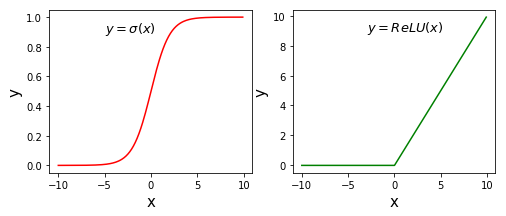

In [82]:
# ReLU和Sigmoid激活函数示意图
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#设置图片大小
plt.figure(figsize=(8, 3))

# x是1维数组，数组大小是从-10. 到10.的实数，每隔0.1取一个点
x = np.arange(-10, 10, 0.1)
# 计算 Sigmoid函数
s = 1.0 / (1 + np.exp(- x))

# 计算ReLU函数
y = np.clip(x, a_min = 0., a_max = None)

#########################################################
# 以下部分为画图程序

# 设置两个子图窗口，将Sigmoid的函数图像画在左边
f = plt.subplot(121)
# 画出函数曲线
plt.plot(x, s, color='r')
# 添加文字说明
plt.text(-5., 0.9, r'$y=\sigma(x)$', fontsize=13)
# 设置坐标轴格式
currentAxis=plt.gca()
currentAxis.xaxis.set_label_text('x', fontsize=15)
currentAxis.yaxis.set_label_text('y', fontsize=15)

# 将ReLU的函数图像画在左边
f = plt.subplot(122)
# 画出函数曲线
plt.plot(x, y, color='g')
# 添加文字说明
plt.text(-3.0, 9, r'$y=ReLU(x)$', fontsize=13)
# 设置坐标轴格式
currentAxis=plt.gca()
currentAxis.xaxis.set_label_text('x', fontsize=15)
currentAxis.yaxis.set_label_text('y', fontsize=15)

plt.show()

## 图像翻转和裁剪

图像是由像素点构成的矩阵，其数值可以用ndarray来表示。将上述介绍的操作用在图像数据对应的ndarray上，可以很轻松的实现图片的翻转、裁剪和亮度调整，具体代码和效果如下所示。

In [83]:
# 导入需要的包
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 读入图片
image = Image.open('./work/images/000000001584.jpg')
image = np.array(image)
# 查看数据形状，其形状是[H, W, 3]，
# 其中H代表高度， W是宽度，3代表RGB三个通道
image.shape

(612, 612, 3)

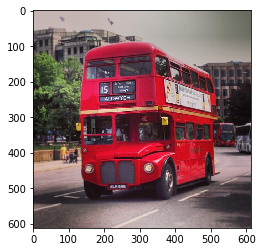

In [84]:
# 原始图片
plt.imshow(image)

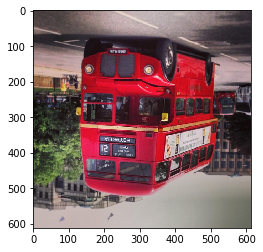

In [85]:
# 垂直方向翻转
# 这里使用数组切片的方式来完成，
# 相当于将图片最后一行挪到第一行，
# 倒数第二行挪到第二行，..., 
# 第一行挪到倒数第一行
# 对于行指标，使用::-1来表示切片，
# 负数步长表示以最后一个元素为起点，向左走寻找下一个点
# 对于列指标和RGB通道，仅使用:表示该维度不改变
image2 = image[::-1, :, :]
plt.imshow(image2)

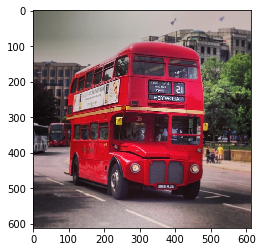

In [86]:
# 水平方向翻转
image3 = image[:, ::-1, :]
plt.imshow(image3)

In [87]:
# 保存图片
im3 = Image.fromarray(image3)
im3.save('im3.jpg')

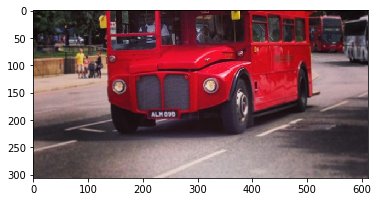

In [88]:
#  高度方向裁剪
H, W = image.shape[0], image.shape[1]
# 注意此处用整除，H_start必须为整数
H1 = H // 2 
H2 = H
image4 = image[H1:H2, :, :]
plt.imshow(image4)

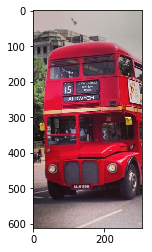

In [89]:
#  宽度方向裁剪
W1 = W//6
W2 = W//3 * 2
image5 = image[:, W1:W2, :]
plt.imshow(image5)

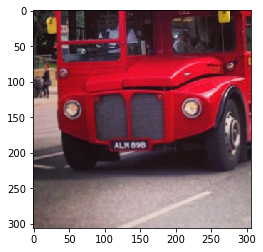

In [90]:
# 两个方向同时裁剪
image5 = image[H1:H2, \
               W1:W2, :]
plt.imshow(image5)

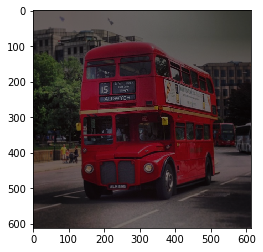

In [91]:
# 调整亮度
image6 = image * 0.5
plt.imshow(image6.astype('uint8'))

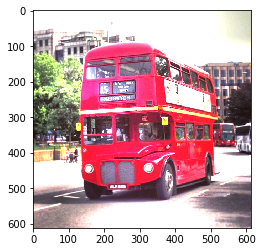

In [92]:
# 调整亮度
image7 = image * 2.0
# 由于图片的RGB像素值必须在0-255之间，
# 此处使用np.clip进行数值裁剪
image7 = np.clip(image7, \
        a_min=None, a_max=255.)
plt.imshow(image7.astype('uint8'))

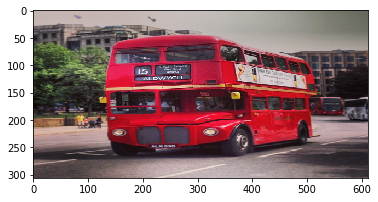

In [93]:
#高度方向每隔一行取像素点
image8 = image[::2, :, :]
plt.imshow(image8)

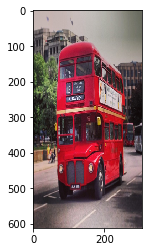

In [94]:
#宽度方向每隔一列取像素点
image9 = image[:, ::2, :]
plt.imshow(image9)

(306, 306, 3)

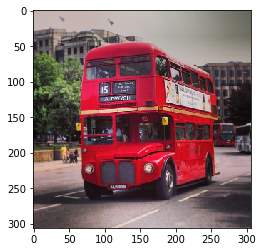

In [97]:
#间隔行列采样，图像尺寸会减半，清晰度变差
image10 = image[::2, ::2, :]
plt.imshow(image10)
image10.shape

###  作业1-7：使用numpy计算tanh激活函数

tanh是神经网络中常用的一种激活函数，其定义如下：

$$y = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

请参照讲义中Sigmoid激活函数的计算程序，用numpy实现tanh函数的计算，并画出其函数曲线。

提交方式：请用numpy写出计算程序，并画出tanh函数曲线图，x的取值范围设置为[-10., 10.]。

###  作业1-8： 统计随机生成矩阵中有多少个元素大于0

假设使用np.random.randn生成了随机数构成的矩阵：

        p = np.random.randn(10, 10)

请写一段程序统计其中有多少个元素大于0？

提示：可以试下使用 q = (p > 0)，观察q是什么的数据类型和元素的取值。

提交方式：提交计算的代码，能够直接运行输出统计出来的结果。
